### Binary classification
#### Importing libraries
- importing necessary libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
url="https://raw.githubusercontent.com/lumidenoir/Project2022/assignment/Applications_Of_Reinforcement_Learning/Assignment-3/210299_krishna%20dantu/"

#### Functions

In [40]:
def normalise(matrix):
    factor1=matrix.min()
    factor2=matrix.max()-matrix.min()
    matrix_nor = (matrix-factor1)/factor2
    return matrix_nor,factor1,factor2

def concate(matrix):
    matrix=np.concatenate((np.ones((matrix.shape[0],1)),matrix), axis=1)
    return matrix

#### Sigmoid and modified functions

In [41]:
def sigmoid(Z):
    sig=1/(1+np.exp(-Z))
    return sig

def costfunction(X,y,theta,type):
    ypre=X.dot(theta.T)
    term1=-y*(np.log(sigmoid(ypre)))
    term2=-(1-y)*np.log(1-sigmoid(ypre))
    return (1/X.shape[0])*np.sum(term1+term2)

def gradientdescent(X,y,theta,cycle,alpha,type):
    cost = np.zeros(cycle)
    for i in range(cycle):
        error=(sigmoid(X@theta.T)-y)
        multiplyerror = (error.T@X)
        theta = theta-(alpha/X.shape[1])*multiplyerror
        cost[i] = costfunction(X, y, theta,type)
    return theta,cost

#### Prediction function

In [42]:
def Predict(X,theta):
    y_predict=X.dot(theta.T)
    for i in range(y_predict.shape[0]):
     if y_predict[i,0]<0:
        y_predict[i,0]=0
     elif y_predict[i,0]>0:
        y_predict[i,0]=1
    return y_predict

#### Missing age filling

In [43]:
def fill_age(url, dataset):#filling age with 0
    if dataset=='train':
        labels=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']
        col=3
    elif dataset=='test':
        labels=['Pclass','Sex','Age','SibSp','Parch','Fare']
        col=2
    data=pd.read_csv(url, skipinitialspace=True, usecols=labels)#url
    data['Sex'].replace(['male','female'],[1,0],inplace=True)
    for i in range(data.shape[0]):
        if math.isnan(data.iloc[i,col]):
            data.iloc[i,col]=0
    return data

#### training the model

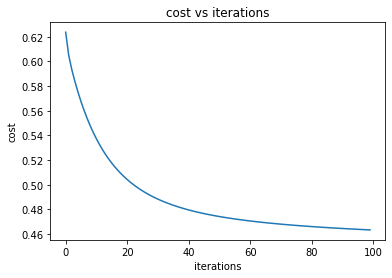

In [44]:
train_data=fill_age(url+"train.csv",'train')#age fill with 0
data_cat=train_data.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare']]
data_survive=train_data.loc[:,['Survived']]
theta=np.array([[0,0,0,0,0,0,0]])
data_cat,fac1,fac2=normalise(data_cat)
data_cat=concate(data_cat)
theta,cost2=gradientdescent(data_cat,data_survive,theta,100,0.01,'sig')
survive_predict=Predict(data_cat,theta)

plt.plot(range(100),cost2)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("cost vs iterations")
plt.show()

#### predicting for test values

In [45]:
test_data=fill_age(url+"test.csv",'test')
test_cat=test_data.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare']].values
test_cat=(test_cat-np.array(fac1))/np.array(fac2)
test_cat=concate(test_cat)
test_predict=Predict(test_cat,theta)

#### accuracy calculation

In [46]:
df=pd.read_csv(url+"gender_submission.csv",skipinitialspace=True, usecols=['Survived']).values
acc=sum(test_predict==df)/len(df)
print("Accuracy of model is",acc)

Accuracy of model is [0.99760766]


#### task 2:

In [47]:
query_arpit=concate((np.array([[3,1,20,0,0,7.5]])-np.array(fac1))/np.array(fac2))
query_shreya=concate((np.array([[1,0,19,1,1,512]])-np.array(fac1))/np.array(fac2))
qa=Predict(query_arpit,theta)
qs=Predict(query_shreya,theta)
print("survival of arpit and shreya are",qa[0,0],"and",qs[0,0],"repectively")

survival of arpit and shreya are 0.0 and 1.0 repectively
